In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
import glob
from sncosmo.salt2utils import BicubicInterpolator
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
import sncosmo
from scipy.interpolate import interp1d
from numpy import random
import pickle as pk
from astropy.table import Table
from sncosmo.constants import HC_ERG_AA
from sklearn import preprocessing

SCALE_FACTOR = 1e-12

sns.set_style("whitegrid", {'axes.grid':'False','xtick.bottom': True,'ytick.left': True})

params = {"text.usetex" : True,'font.size': 20, 'font.family':'serif', 'font.serif':'Computer Modern'}
plt.rcParams.update(params)

In [2]:
class ScalarFormatterClass1(ScalarFormatter):
    def _set_format(self):
        self.format = "%1.1f"

In [3]:
p_grid=np.arange(-10,51,1)
w_grid1=np.arange(3350,8710,10)
w_grid2=np.arange(3400,8410,10)

In [4]:
fname=[]
for file in glob.glob("./final_SEDs/*.dat"):
    fname.append(file.split("/")[2].split(".")[0])

In [5]:
exclude=["Train_SN93_SED","Test_SN15_SED","Test_SN26_SED","Train_SN30_SED","Train_SN96_SED"]

In [6]:
data=[]
sne_names=[]
for sn in fname:
    if sn not in exclude:
        data.append(pd.read_csv(f"./final_SEDs/{sn}.dat")["flux"].values)
        sne_names.append(sn)

In [7]:
len(data)

164

## Applying FA

In [8]:
train_data, test_data, train_names, test_names=train_test_split(data,sne_names,test_size=0.1,random_state=0)

### Preprocessing, scaling data

In [9]:
scaler=preprocessing.StandardScaler()

In [10]:
train_data_scaled=[]
for i in range(len(train_data)):
    train_data_scaled.append(scaler.fit_transform(train_data[i].reshape(-1, 1)).flatten())

In [11]:
X, Y=np.meshgrid(p_grid,w_grid2)

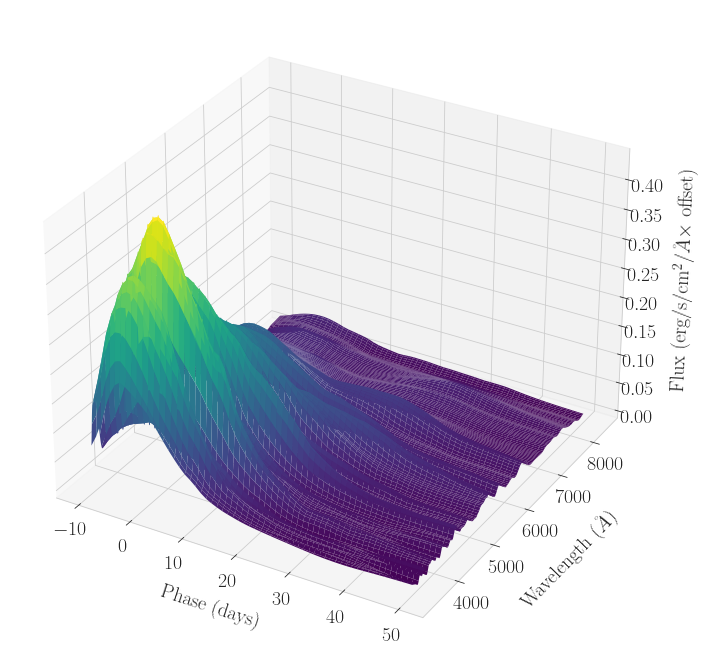

In [12]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,train_data[0].reshape(X.shape),cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
#fig.colorbar(g, ax=ax)
plt.show()

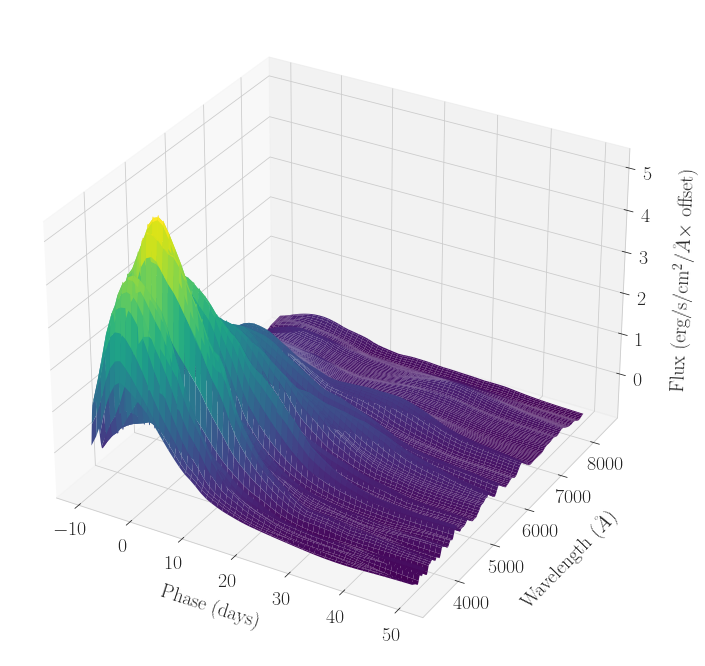

In [13]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,train_data_scaled[0].reshape(X.shape),cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
#fig.colorbar(g, ax=ax)
plt.show()

### FA sklearn

In [14]:
np.array(train_data_scaled).shape

(147, 30561)

In [15]:
training_data=np.array(train_data_scaled).T

In [16]:
fa3_no_rot = FactorAnalysis(3,rotation=None)
fa3_quartimax = FactorAnalysis(3,rotation="quartimax")
fa3_varimax = FactorAnalysis(3,rotation="varimax")

In [17]:
factors_no_rot=fa3_no_rot.fit_transform(training_data)
factors_quartimax=fa3_quartimax.fit_transform(training_data)
factors_varimax=fa3_varimax.fit_transform(training_data)

In [18]:
len(training_data.T)

147

In [19]:
# The data entering the training is already scaled:
# centered by mean and unit variance

In [20]:
for i in range(len(training_data.T)):
    print(np.mean(training_data.T[i]))

0.0
8.927993538558243e-17
-1.3391990307837364e-16
-5.951995692372163e-17
7.439994615465203e-17
0.0
-8.927993538558243e-17
0.0
-1.4879989230930406e-16
-1.3391990307837364e-16
-1.0415992461651284e-16
-8.927993538558243e-17
-1.4879989230930407e-17
5.951995692372163e-17
-1.4879989230930407e-17
4.4639967692791217e-17
-2.9759978461860813e-17
-8.927993538558243e-17
8.927993538558243e-17
7.439994615465203e-17
1.6367988154023445e-16
-1.0415992461651284e-16
0.0
5.951995692372163e-17
7.439994615465203e-17
7.439994615465203e-17
-7.439994615465203e-17
1.3391990307837364e-16
0.0
-1.1903991384744325e-16
1.4879989230930407e-17
-1.3391990307837364e-16
8.927993538558243e-17
7.439994615465203e-17
-1.7855987077116487e-16
8.927993538558243e-17
1.3391990307837364e-16
0.0
-1.4879989230930407e-17
1.4879989230930407e-17
-4.4639967692791217e-17
-5.951995692372163e-17
-1.4879989230930407e-17
1.3391990307837364e-16
-5.951995692372163e-17
8.927993538558243e-17
8.927993538558243e-17
8.927993538558243e-17
1.33919903

In [21]:
for i in range(len(training_data.T)):
    print(np.std(training_data.T[i]))

1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.999999999999999

In [22]:
# The data leaving the FA is also centered by mean
# and with unit variance

In [23]:
for i in range(3):
    print(np.mean(factors_no_rot[:,i]))
    print(np.mean(factors_quartimax[:,i]))
    print(np.mean(factors_varimax[:,i]))

-1.4879989230930407e-17
0.0
1.4879989230930407e-17
-5.207996230825642e-17
2.2319983846395608e-17
9.299993269331503e-17
1.4879989230930407e-17
0.0
-8.927993538558243e-17


In [24]:
for i in range(3):
    print(np.std(factors_no_rot[:,i]))
    print(np.std(factors_quartimax[:,i]))
    print(np.std(factors_varimax[:,i]))

0.9999572248730955
0.9999515149370922
0.9986382281964735
0.9962985897898474
0.9958065046468115
0.996323468948618
0.993303841343774
0.9938029109937018
0.9946049905506135


In [25]:
fa_loadings_no_rot = fa3_no_rot.components_.T
fa_loadings_quartimax = fa3_quartimax.components_.T
fa_loadings_varimax = fa3_varimax.components_.T

total_var = np.sum(np.var(training_data,axis=0))

In [26]:
var_exp_no_rot = np.sum(fa_loadings_no_rot**2, axis=0)
var_exp_quartimax = np.sum(fa_loadings_quartimax**2, axis=0)
var_exp_varimax = np.sum(fa_loadings_varimax**2, axis=0)

prop_var_exp_no_rot = var_exp_no_rot/total_var
prop_var_exp_quartimax = var_exp_quartimax/total_var
prop_var_exp_varimax = var_exp_varimax/total_var

cum_prop_var_exp_no_rot = np.cumsum(var_exp_no_rot/total_var)
cum_prop_var_exp_quartimax = np.cumsum(var_exp_quartimax/total_var)
cum_prop_var_exp_varimax = np.cumsum(var_exp_varimax/total_var)

In [27]:
print(f"variance explained no rot: {var_exp_no_rot.round(2)}")
print(f"proportion of variance explained no rot: {prop_var_exp_no_rot.round(3)}")
print(f"cumulative proportion of variance explained no rot: {cum_prop_var_exp_no_rot.round(3)}")

variance explained no rot: [137.43   3.4    1.48]
proportion of variance explained no rot: [0.935 0.023 0.01 ]
cumulative proportion of variance explained no rot: [0.935 0.958 0.968]


In [28]:
print(f"variance explained quartimax: {var_exp_quartimax.round(2)}")
print(f"proportion of variance explained quartimax: {prop_var_exp_quartimax.round(3)}")
print(f"cumulative proportion of variance explained quartimax: {cum_prop_var_exp_quartimax.round(3)}")

variance explained quartimax: [137.75   3.34   1.23]
proportion of variance explained quartimax: [0.937 0.023 0.008]
cumulative proportion of variance explained quartimax: [0.937 0.96  0.968]


In [29]:
print(f"variance explained no rot varimax: {var_exp_varimax.round(2)}")
print(f"proportion of variance explained no rot varimax: {prop_var_exp_varimax.round(3)}")
print(f"cumulative proportion of variance explained no rot varimax: {cum_prop_var_exp_varimax.round(3)}")

variance explained no rot varimax: [83.55 40.87 17.9 ]
proportion of variance explained no rot varimax: [0.568 0.278 0.122]
cumulative proportion of variance explained no rot varimax: [0.568 0.846 0.968]


In [30]:
M_3_no_rot=[]
for i in range(3):
    sup_no_rot=factors_no_rot[::,i]
    M_3_no_rot.append(sup_no_rot.reshape(X.shape))

In [31]:
M_3_quartimax=[]
for i in range(3):
    sup_quartimax=factors_quartimax[::,i]
    M_3_quartimax.append(sup_quartimax.reshape(X.shape))

In [32]:
M_3_varimax=[]
for i in range(3):
    sup_varimax=factors_varimax[::,i]
    M_3_varimax.append(sup_varimax.reshape(X.shape))

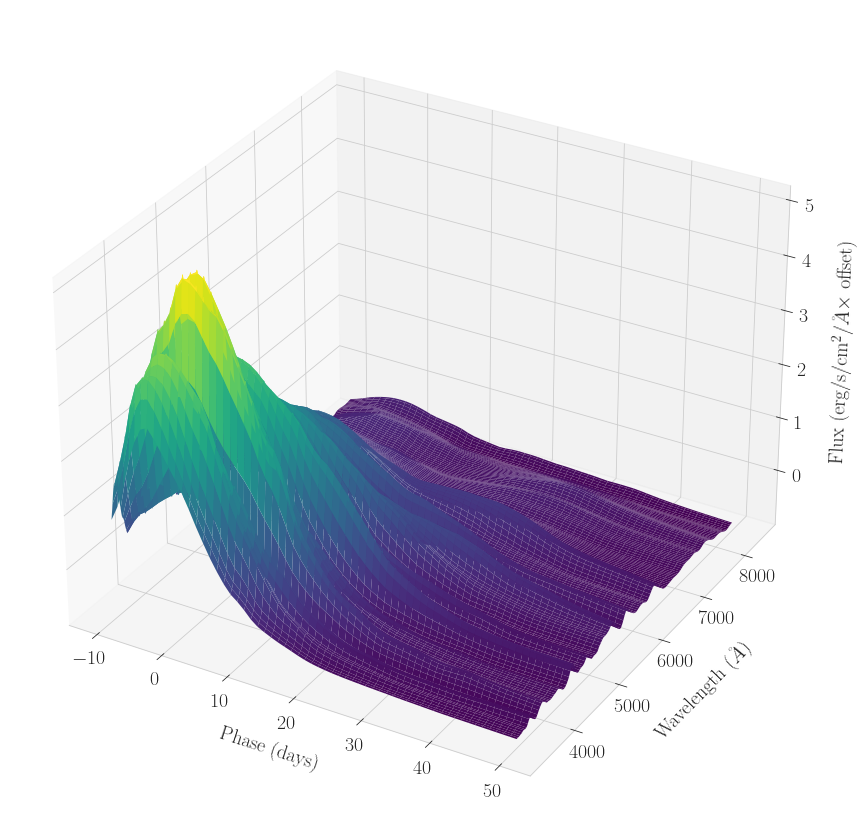

In [33]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_no_rot[0],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

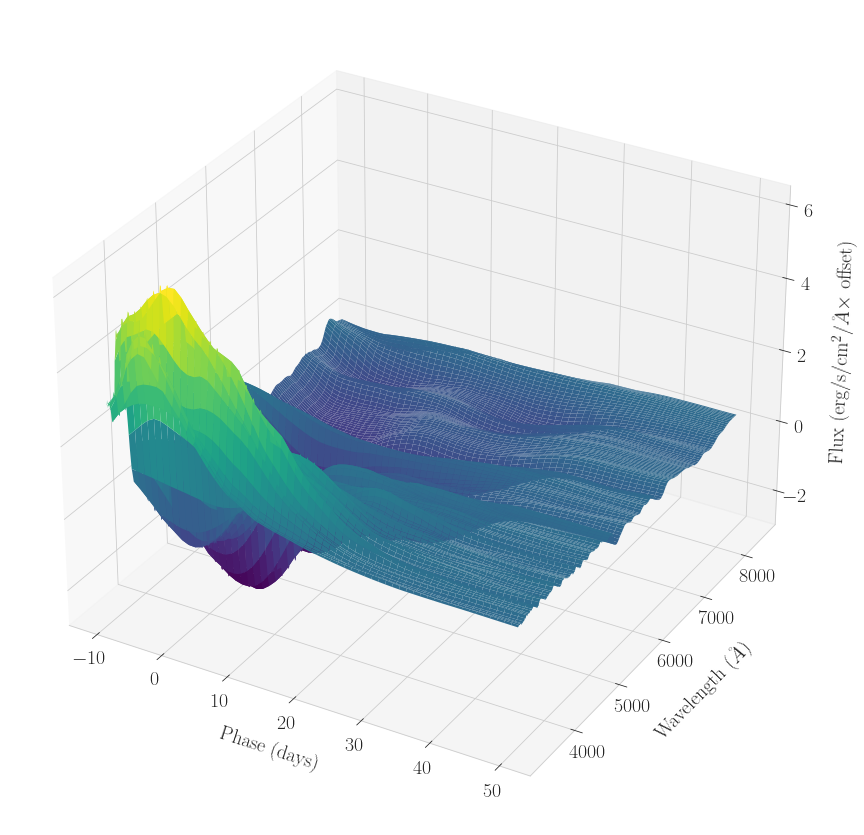

In [34]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_no_rot[1],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

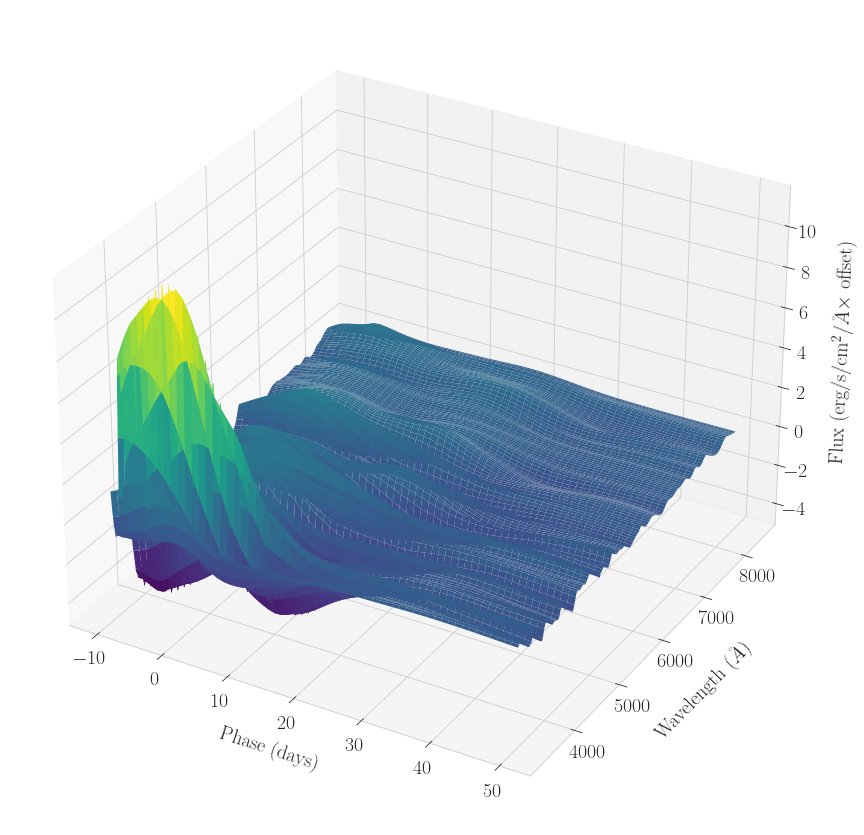

In [35]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_no_rot[2],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

In [36]:
# In the scaled or not case, the three surfaces without rotation are pretty similar

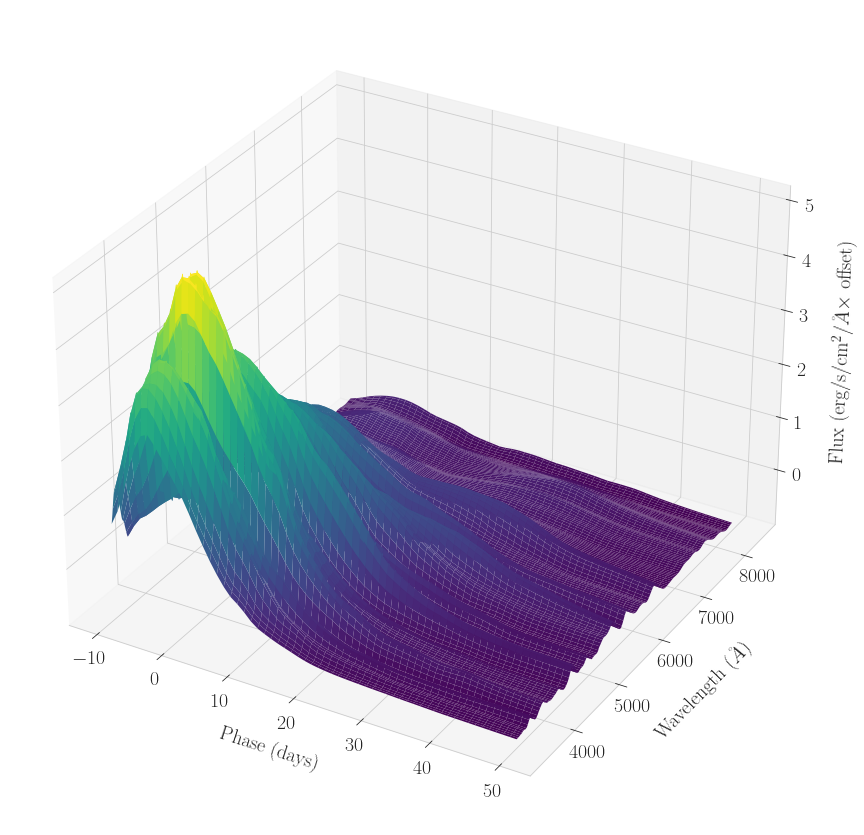

In [37]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_quartimax[0],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

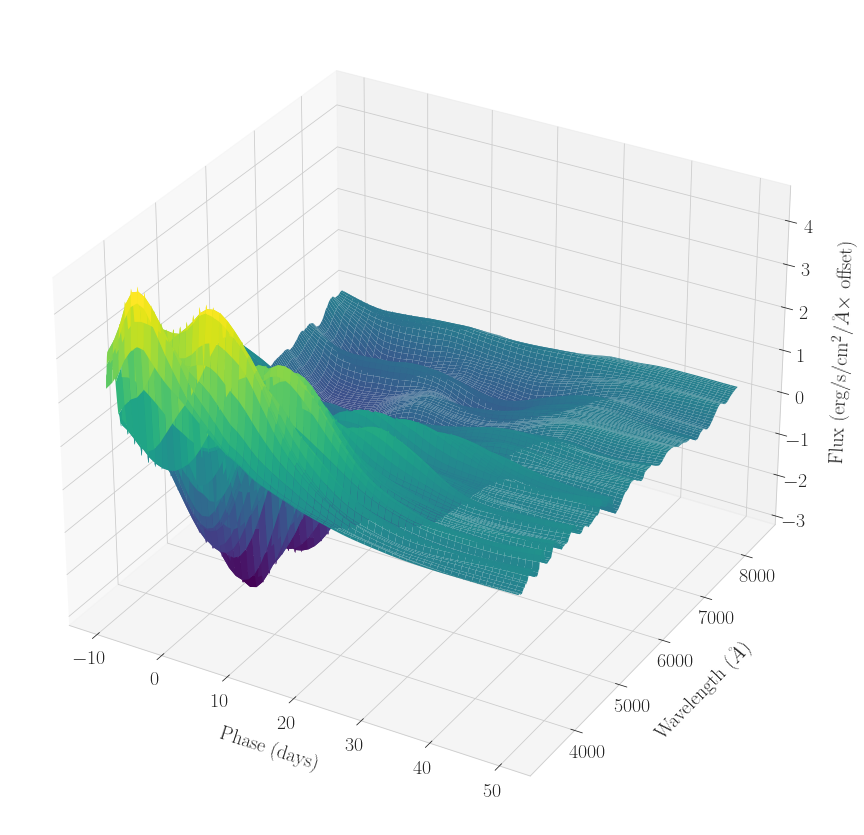

In [49]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_quartimax[1],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

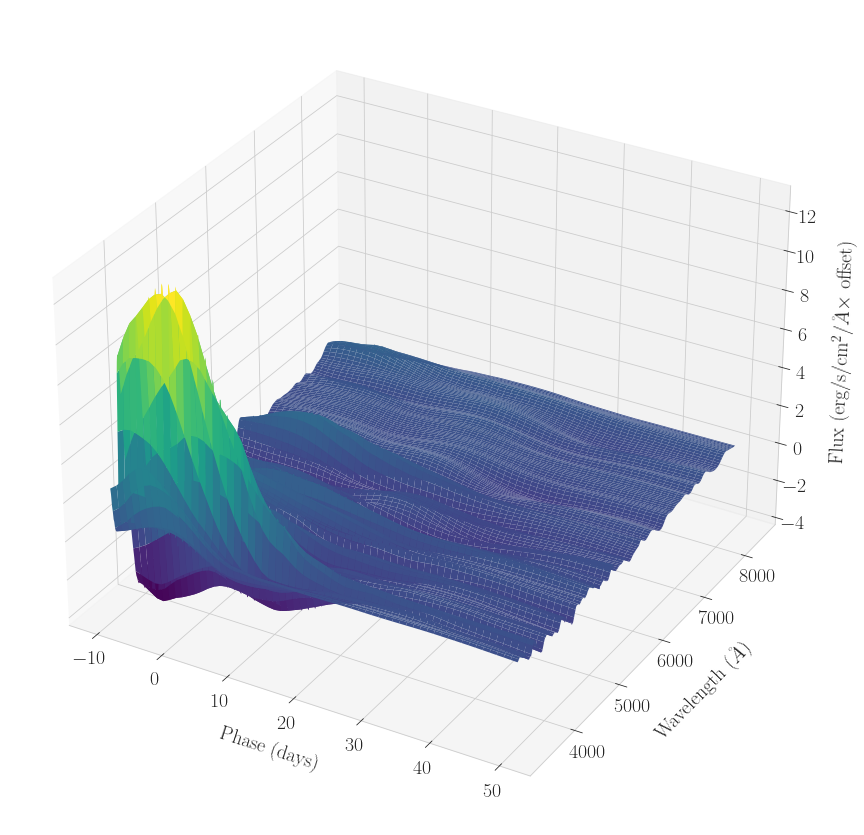

In [39]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_quartimax[2],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

In [40]:
# For the quartimax case, the surfaces are all different. The M0s have few notable differences.
# The second and third surfaces from one were more similar to the third and second of the other,
# respectively. Not completly equal and with different scales.

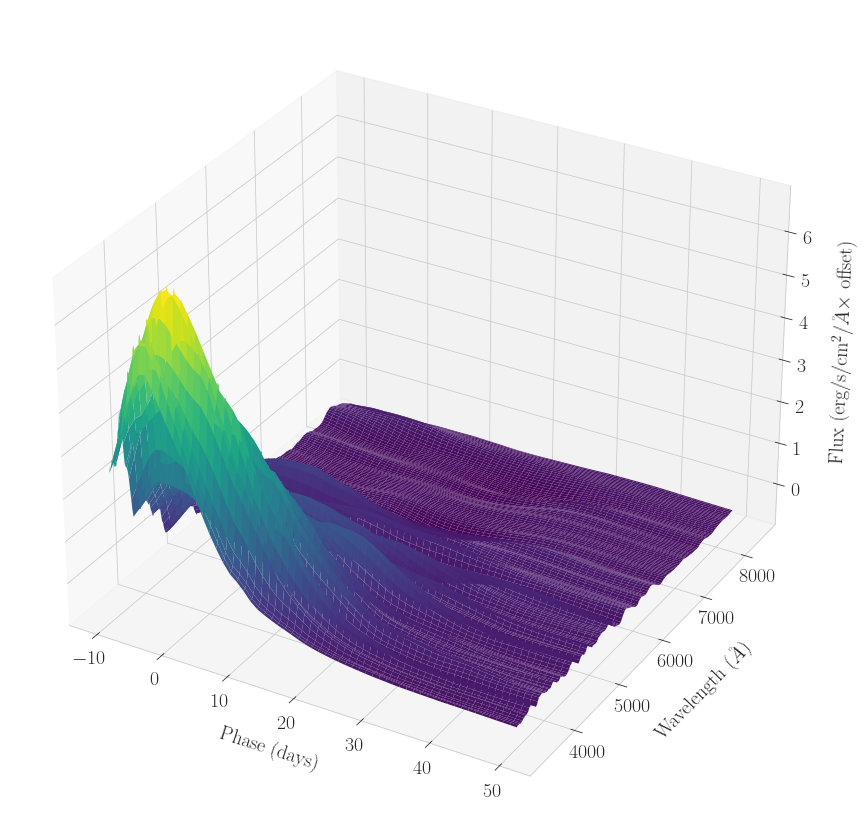

In [41]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_varimax[0],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

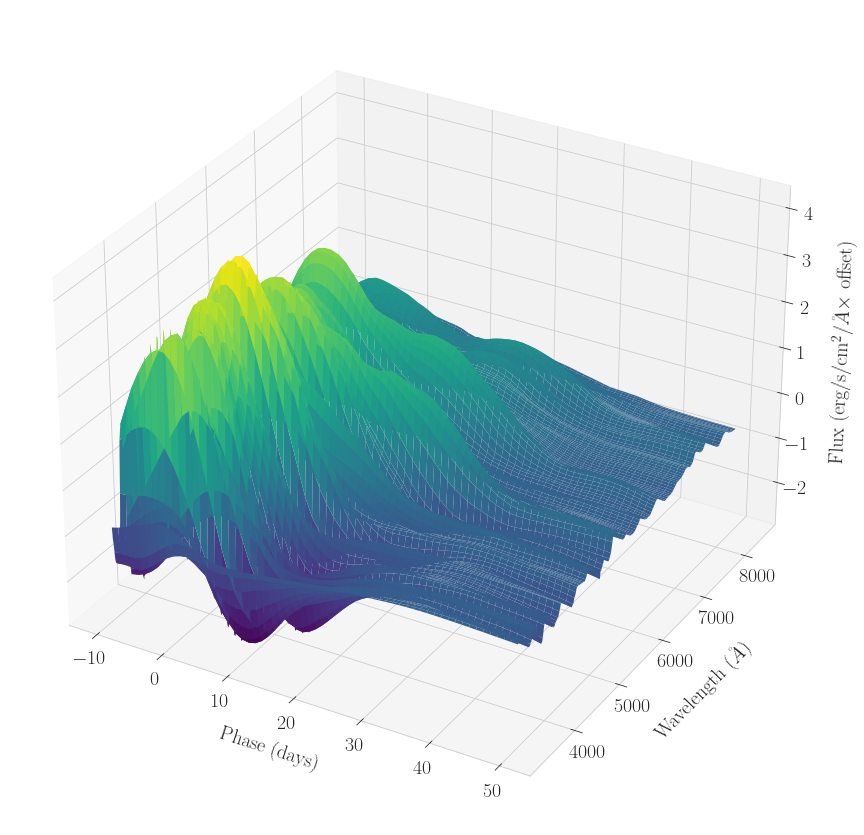

In [50]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,-M_3_varimax[1],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

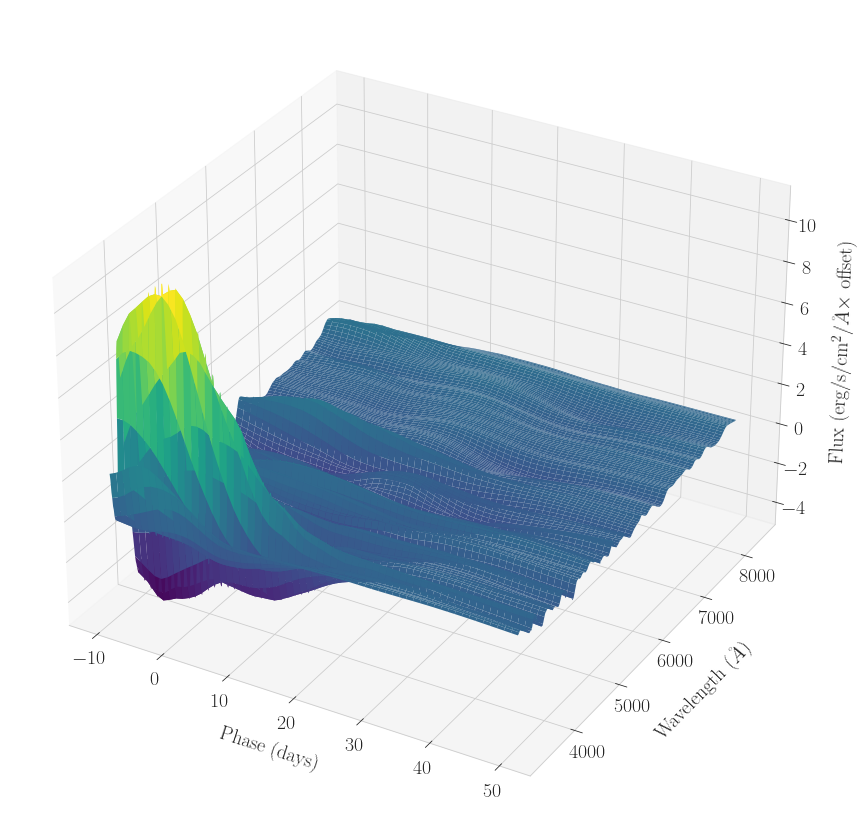

In [43]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

g=ax.plot_surface(X,Y,M_3_varimax[2],cmap="viridis",edgecolor='none',ccount=200,rcount=200)
ax.set_xlabel(r"Phase (days)")
ax.set_ylabel(r"Wavelength ($\AA$)")
ax.set_zlabel(r"Flux (erg/s/cm$^2$/$\AA \times$ offset)")
ax.yaxis.labelpad=20
ax.xaxis.labelpad=15
ax.zaxis.labelpad=15
fig.tight_layout()
plt.show()

In [44]:
# For the varimax case, we have a similar situation as the varimax. The surfaces are all different. 
# The second and third surfaces from one were more similar to the third and second of the other,
# respectively. Not completly equal and with slightly different scales.

In [45]:
# From this differences I think we can conclude sk learn when perfoming FA does not scale the data 
# prior the algorithm application. However, it does returns a mean centered and unit scaled 
# common factors.

# The scaling makes every feature have the same weigth. While cenetring only ensures you are
# finding the right directions for the new basis. The last step being crucial. So, we only
# perfom centering prior to sklearn PCA and FA.